In [1]:
%%html
<svg height="300" width="600">
    <!-- arcs from hidden unit 1 to visible units -->
    <line x1="160" y1="50" x2="40" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    <line x1="160" y1="50" x2="120" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    <line x1="160" y1="50" x2="200" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    <line x1="160" y1="50" x2="280" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    <line x1="160" y1="50" x2="360" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    <line x1="160" y1="50" x2="440" y2="200" style="stroke:rgb(0,0,0);stroke-width:1" />
    
    <!-- arcs from hidden unit 2 to visible units -->
    <line x1="320" y1="50" x2="40" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    <line x1="320" y1="50" x2="120" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    <line x1="320" y1="50" x2="200" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    <line x1="320" y1="50" x2="280" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    <line x1="320" y1="50" x2="360" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    <line x1="320" y1="50" x2="440" y2="200" style="stroke:rgb(180,180,180);stroke-width:1" />
    
    <line x1="540" y1="120" x2="160" y2="50" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="320" y2="50" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="40" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="120" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="200" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="280" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="360" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    <line x1="540" y1="120" x2="440" y2="200" style="stroke:rgba(0,100,0, 0.5);stroke-width:0.5" />
    
    <!-- hidden units -->
    <circle cx="160" cy="50" r="20" stroke="red" stroke-width="2" fill="white" />
    <circle cx="320" cy="50" r="20" stroke="red" stroke-width="2" fill="white" />
    
    <text x="154" y="55"><tspan>h<tspan dy="5">1</tspan></tspan></text>
    <text x="314" y="55"><tspan>h<tspan dy="5">2</tspan></tspan></text>
    
    <!-- visible units-->
    <circle cx="40" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    <circle cx="120" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    <circle cx="200" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    <circle cx="280" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    <circle cx="360" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    <circle cx="440" cy="200" r="20" stroke="blue" stroke-width="2" fill="white" />
    
    <text x="34" y="200"><tspan>v<tspan dy="5">1</tspan></tspan></text>
    <text x="114" y="200"><tspan>v<tspan dy="5">2</tspan></tspan></text>
    <text x="194" y="200"><tspan>v<tspan dy="5">3</tspan></tspan></text>
    <text x="274" y="200"><tspan>v<tspan dy="5">4</tspan></tspan></text>
    <text x="354" y="200"><tspan>v<tspan dy="5">5</tspan></tspan></text>
    <text x="434" y="200"><tspan>v<tspan dy="5">6</tspan></tspan></text>
    
    <!-- bias unit -->
    <circle cx="540" cy="120" r="20" stroke="black" stroke-width="2" fill="white" />
    <text x="535" y="123"><tspan>b</tspan></text>
</svg> 

In [2]:
import numpy as np
from scipy.special import expit

np.random.seed(37)    

In [3]:
def get_weight_matrix(n_visible, n_hidden, mean=0.0, stdev=0.1):
    w = np.random.normal(loc=mean, scale=stdev, size=n_visible * n_hidden).reshape(n_visible, n_hidden)
    c = np.zeros((n_visible, 1))
    r = np.zeros((1, n_hidden + 1))
    m = np.hstack([c, w])
    m = np.vstack([r, m])
    return m

def get_data_matrix(data):
    c = np.ones((data.shape[0], 1))
    m = np.hstack([c, data])
    return m

def positive_contrastive_divergence(X, W):
    ph_activations = X.dot(W)
    ph_probs = expit(ph_activations)
    ph_probs[:, 0] = 1.0
    ph_states = ph_probs > np.random.rand(ph_probs.shape[1])
    p_associations = X.T.dot(ph_probs)
    return ph_states, p_associations

def negative_contrastive_divergence(ph_states, W):
    nv_activations = ph_states.dot(W.T)
    nv_probs = expit(nv_activations)
    nv_probs[:, 0] = 1.0
    nh_activations = nv_probs.dot(W)
    nh_probs = expit(nh_activations)
    n_associations = nv_probs.T.dot(nh_probs)
    return nv_probs, n_associations

def update_weights(n, p_associations, n_associations, W, lr=0.1):
    M = W + lr * ((p_associations - n_associations) / float(n))
    return M

def query_hidden(v, n_hidden, W):
    n = v.shape[0]
    h_states = np.ones((n, n_hidden + 1))
    d = np.hstack([np.ones((n, 1)), v])
    h_activations = d.dot(W)
    h_probs = expit(h_activations)
    h_states[:,:] = h_probs > np.random.rand(n, n_hidden + 1)
    return h_states[:,1:]

def query_visible(h, n_visible, W):
    n = h.shape[0]
    v_states = np.ones((n, n_visible + 1))
    d = np.hstack([np.ones((n, 1)), h])
    v_activations = d.dot(W.T)
    v_probs = expit(v_activations)
    v_states[:,:] = v_probs > np.random.rand(n, n_visible + 1)
    return v_states[:,1:]

def daydream(n_samples, n_visible, n_hidden, W):
    samples = np.ones((n_samples, n_visible + 1))
    samples[0,1:] = np.random.rand(n_visible)
    
    for i in range(1, n_samples):
        visible = samples[i-1,:]
        h_activations = visible.dot(W)
        h_probs = expit(h_activations)
        h_states = h_probs > np.random.rand(n_hidden + 1)
        h_states[0] = 1
        
        v_activations = h_states.dot(W.T)
        v_probs = expit(v_activations)
        v_states = v_probs > np.random.rand(n_visible + 1)
        
        samples[i, :] = v_states
    
    return samples[-1, :]

# Fake movies

In [4]:
X = get_data_matrix(np.array([
    [1,1,1,0,0,0],
    [1,0,1,0,0,0],
    [1,1,1,0,0,0],
    [0,0,1,1,1,0],
    [0,0,1,1,0,0],
    [0,0,1,1,1,0]]))

In [5]:
n_visible = 6
n_hidden = 2
W = get_weight_matrix(n_visible, n_hidden)

In [6]:
from tqdm import tqdm
import pandas as pd

def train(X, W, max_iters=5000):
    loss_trace = []
    for epoch in tqdm(range(max_iters)):
        ph_states, p_associations = positive_contrastive_divergence(X, W)
        nv_probs, n_associations = negative_contrastive_divergence(ph_states, W)
        W = update_weights(X.shape[0], p_associations, n_associations, W)

        error = np.sum((X - nv_probs) ** 2)
        t = (epoch, error)
        loss_trace.append(t)
    loss_df = pd.DataFrame(data=loss_trace, columns=['epoch', 'loss'])
    return W, loss_df

In [7]:
W, loss = train(X, W)
print(W)

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 18796.99it/s]


[[ 2.53037996  2.45858985  0.0810972 ]
 [-0.22471573 -3.92533273  7.42939654]
 [ 0.35109567 -6.92624773  3.05664351]
 [ 4.93552312  4.06165019  1.75982293]
 [ 0.16666718  4.31462577 -7.89124389]
 [-0.91730461  1.5951622  -5.34173176]
 [-4.06156083 -2.54953871 -2.38364613]]


Text(0,0.5,'loss')

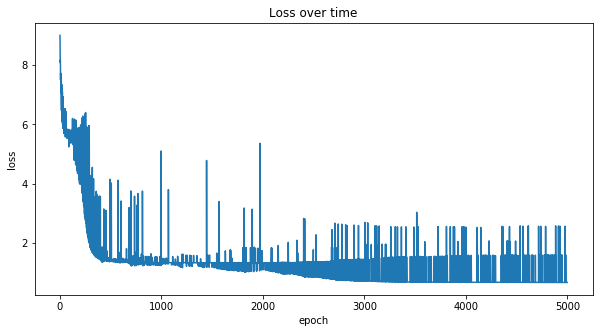

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(loss['epoch'], loss['loss'])
ax.set_title('Loss over time')
ax.set_xlabel(r'epoch')
ax.set_ylabel(r'loss')

In [9]:
query_hidden(np.array([[0,0,0,1,1,0]]), n_hidden, W)

array([[1., 0.]])

In [10]:
query_hidden(np.array([[1,1,0,0,0,0]]), n_hidden, W)

array([[0., 1.]])

In [11]:
query_visible(np.array([[1,0]]), n_visible, W)

array([[0., 0., 1., 1., 1., 0.]])

In [12]:
query_visible(np.array([[0,1]]), n_visible, W)

array([[1., 1., 1., 0., 0., 0.]])

In [13]:
for i in range(10):
    print(daydream(500, n_visible, n_hidden, W))

[1. 1. 1. 1. 0. 0. 0.]
[1. 0. 0. 1. 1. 1. 0.]
[1. 0. 0. 1. 1. 1. 0.]
[1. 1. 0. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]
[1. 1. 1. 1. 0. 0. 0.]


# Names

In [14]:
def get_max_length(names):
    max_length = 0
    for k, v in names.iteritems():
        length = max([len(name) for name in v])
        if length > max_length:
            max_length = length
    return max_length

def get_encoding():
    letters = 'abcdefghijklmnopqrstuvwxyz#'
    d = {}
    for i in range(len(letters)):
        d[letters[i]] = i
    return d

def get_reverse_encoding():
    letters = 'abcdefghijklmnopqrstuvwxyz#'
    d = {}
    for i in range(len(letters)):
        d[i] = letters[i]
    return d

def encode_letter(letter, encoding=get_encoding()):
    n = len(encoding)
    ohe = np.zeros(n)
    idx = encoding[letter]
    ohe[idx] = 1
    return ohe

def encode_name(name, max_letters, encoding=get_encoding()):
    name_length = len(name)
    name_ohe = [encode_letter(name[i], encoding) for i in range(name_length)]
    padd_ohe = [encode_letter('#', encoding) for _ in range(name_length, max_letters)]
    
    ohe = []
    ohe.extend(name_ohe)
    ohe.extend(padd_ohe)
    ohe = np.hstack(ohe)
    
    return ohe

def encode_names(names, max_letters, encoding=get_encoding()):
    data = []
    for k, names in names.iteritems():
        for name in names:
            ohe = encode_name(name, max_letters, encoding)
            data.append(ohe)
    return np.array(data)

def flatten_names(names):
    data = []
    for k, names in names.iteritems():
        data.extend(names)
    return data
    
names = {
    'english': [
        'jack', 'thomas', 'joshua', 'william', 'daniel',
        'matthew', 'james', 'joseph', 'harry', 'samuel'
    ],
    'chinese': [
        'wei', 'qiang', 'lei', 'jun', 'yong',
        'jie', 'jin', 'taio', 'de', 'tao'
    ],
    'indian': [
        'mohammed', 'reyansh', 'aarav', 'atharv', 'vivaan',
        'advik', 'ansh', 'ishann', 'dhruv', 'siddharth'
    ]
}

max_letters = get_max_length(names)
encoding = get_encoding()
raw = encode_names(names, max_letters, encoding)
print(raw.shape)

(30L, 243L)


(30L, 244L) X shape
(244L, 4L) W shape
243 n_visible
3 n_hidden


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3815.34it/s]


Text(0,0.5,'loss')

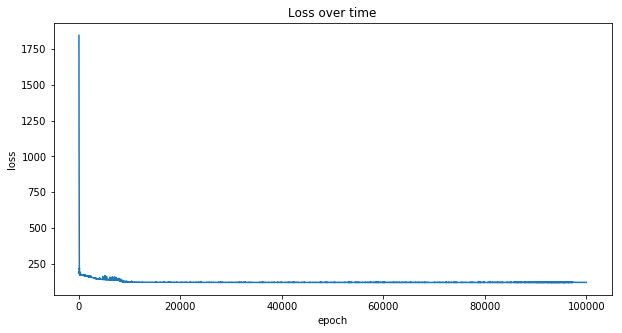

In [19]:
X = get_data_matrix(raw)
print('{} X shape'.format(X.shape))

n_visible = raw.shape[1]
n_hidden = 3
W = get_weight_matrix(n_visible, n_hidden)
print('{} W shape'.format(W.shape))
print('{} n_visible'.format(n_visible))
print('{} n_hidden'.format(n_hidden))

W, loss = train(X, W, max_iters=100000)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(loss['epoch'], loss['loss'])
ax.set_title('Loss over time')
ax.set_xlabel(r'epoch')
ax.set_ylabel(r'loss')

In [20]:
flattened_names = flatten_names(names)

for r in range(len(raw)):
    h = query_hidden(raw[r,:].reshape(1, n_visible), n_hidden, W)
    n = flattened_names[r]
    print('{}: {} {}'.format(r, h, n))

0: [[1. 0. 1.]] mohammed
1: [[1. 1. 1.]] reyansh
2: [[1. 1. 1.]] aarav
3: [[1. 1. 1.]] atharv
4: [[1. 1. 1.]] vivaan
5: [[1. 1. 1.]] advik
6: [[1. 1. 1.]] ansh
7: [[1. 1. 1.]] ishann
8: [[1. 1. 1.]] dhruv
9: [[0. 0. 0.]] siddharth
10: [[0. 1. 1.]] wei
11: [[0. 1. 1.]] qiang
12: [[0. 1. 1.]] lei
13: [[0. 1. 1.]] jun
14: [[0. 1. 1.]] yong
15: [[0. 1. 1.]] jie
16: [[0. 1. 1.]] jin
17: [[0. 1. 1.]] taio
18: [[0. 1. 1.]] de
19: [[0. 1. 1.]] tao
20: [[0. 1. 1.]] jack
21: [[1. 1. 1.]] thomas
22: [[1. 1. 1.]] joshua
23: [[1. 1. 0.]] william
24: [[1. 1. 1.]] daniel
25: [[1. 1. 1.]] matthew
26: [[0. 1. 1.]] james
27: [[1. 1. 1.]] joseph
28: [[1. 1. 1.]] harry
29: [[1. 1. 1.]] samuel


In [21]:
def decode_ohe(v, max_letters, encoding=get_reverse_encoding()):
    print(type(v))
    print(v.shape)
    vector = v[0,:]
    cols = v.shape[1] / max_letters
    rows = max_letters
    vector = vector.reshape(rows, cols)
    print(vector.shape)
    print(vector)
    for row in range(rows):
        idx = np.argmax(vector[row, :])
        print(encoding[idx])
    
rencoding = get_reverse_encoding()
decode_ohe(query_visible(np.array([[0, 1, 1]]), n_visible, W), max_letters, rencoding)

<type 'numpy.ndarray'>
(1L, 243L)
(9L, 27L)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]]
j
i
a
#
a
#
#
#
#


In [22]:
for i in range(10):
    print(daydream(500, n_visible, n_hidden, W))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# References

* [Introduction to Restricted Boltzmann Machines](http://blog.echen.me/2011/07/18/introduction-to-restricted-boltzmann-machines/)
* [Dreaming of names with RBMs](http://colinmorris.github.io/blog/dreaming-rbms)
* [A Practical guide to training restricted Boltzmann machines](http://www.cs.toronto.edu/~hinton/absps/guideTR.pdf)
* [Geometry of the Restricted Boltzmann Machine](http://arxiv.org/abs/0908.4425)
* [Top 100 boy names in India 2017](https://www.babycenter.in/a25024464/top-100-boy-names-in-india-in-2017)
* [The most popular names in China](http://www.theworldofchinese.com/2014/07/the-most-popular-names-in-china-not-a-john-smith-in-sight/)
* [Most Popular Chinese Baby Boy Names ](https://www.mom365.com/baby-names/chinese-boys-names)
* [The 10 Most Popular Babies' Names from English Speaking Countries](http://www.world-english.org/boys_names.htm)